In [109]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 

In [110]:
# crude oil, or any ticker
security = "CL=F"
start_date = '2014-01-01'
end_date = '2024-01-01'

df = yf.download(tickers=security, start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [111]:
# calculate periodic daily return
returns = np.log(1+df['Adj Close'].pct_change())

/Users/joshzheng/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [112]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,73.910004,74.980003,73.389999,73.559998,73.559998,222600
2023-12-26,73.559998,76.180000,73.129997,75.570000,75.570000,208715
2023-12-27,75.320000,75.660004,73.769997,74.110001,74.110001,253323
2023-12-28,73.800003,74.400002,71.720001,71.769997,71.769997,262748
2023-12-29,71.989998,72.620003,71.250000,71.650002,71.650002,214486


In [113]:
returns.dropna()

Date
2014-01-03   -0.015629
2014-01-06   -0.005657
2014-01-07    0.002565
2014-01-08   -0.014409
2014-01-09   -0.007283
                ...   
2023-12-22   -0.004476
2023-12-26    0.026958
2023-12-27   -0.019509
2023-12-28   -0.032084
2023-12-29   -0.001673
Name: Adj Close, Length: 2512, dtype: float64

In [114]:
mu, sigma = returns.mean(), returns.std()

In [115]:
# simulated returns on next year of trading
sim_rets = np.random.normal(mu, sigma, 252)

In [116]:
initial = df['Adj Close'].iloc[-1]

In [117]:
sim_prices = initial * (sim_rets + 1).cumprod()

In [118]:
# acquire Rm market rate (S&P 500)
market = "^GSPC"
sp500_data = yf.download(market, start=start_date, end=end_date)
sp500_data['Daily_Return'] = sp500_data['Adj Close'].pct_change()
annual_returns = sp500_data.groupby(sp500_data.index.year)['Daily_Return'].sum()

# Print annual returns
rm = annual_returns.mean()
print(f"Annual Returns: {rm}")


[*********************100%%**********************]  1 of 1 completed

Annual Returns: 0.11147521896745069


Number of Simulations that Underperformed: 69

Number of Simulations that beat the Market: 25


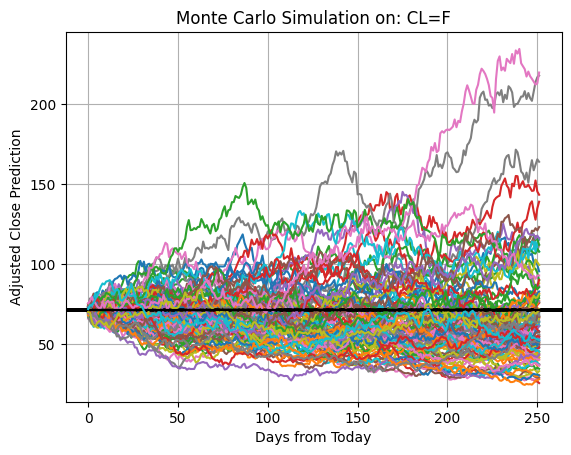

In [119]:
count = 0
mkt_count = 0
simulations = 100

for i in range(simulations):
    # annual monte carlo simulation (252 trading days)
    sim_rets = np.random.normal(mu, sigma, 252) 
    sim_prices = initial * (sim_rets + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.title("Monte Carlo Simulation on: "+security)
    plt.ylabel('Adjusted Close Prediction')
    plt.xlabel('Days from Today') 
    plt.grid(True)
    plt.plot(sim_prices)

    # check if end value >= to initial value
    if sim_prices[-1] >= initial:
        count += 1

    if sim_prices[-1] >= initial * (1+rm): 
        mkt_count += 1

print(f"Number of Simulations that Underperformed: {simulations-count}\n")

print(f"Number of Simulations that beat the Market: {mkt_count}")
